In [6]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
# Para series de tiempo
import statsmodels.api as sm
import numpy as np

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed


import pandas as pd
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


from prophet import Prophet

#
from warnings import catch_warnings
from warnings import filterwarnings

%matplotlib inline








### 1. Haga un análisis exploratorio de los datos que se le presentan (AverageTemperature), se sugiere explorar el comportamiento de la variable y si está distribuidas normalmente, en caso de ser continuas. Meses en los que más/menos  temperatura  hay, comportamiento en los últimos x años,  etc.

In [7]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0)

Se observan los tipos de datos que hay en el dataframe

In [4]:
df.head()

AverageTemperature  AverageTemperatureUncertainty Country
dt                                                                   
1743-11-01               4.384                          2.294   Åland
1743-12-01                 NaN                            NaN   Åland
1744-01-01                 NaN                            NaN   Åland
1744-02-01                 NaN                            NaN   Åland
1744-03-01                 NaN                            NaN   Åland

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  545550 non-null  float64
 2   Country                        577462 non-null  object 
dtypes: float64(2), object(1)
memory usage: 17.6+ MB


In [6]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se observa la cantidad de datos vacios en el dataframe

In [6]:
df.isnull().sum()

AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Se puede observar que los datos tienen una distribucion  sesgada a la izquierda

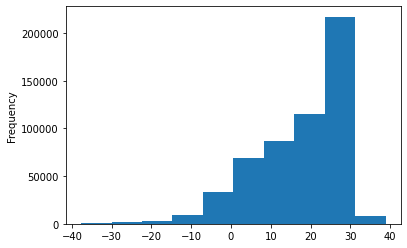

In [7]:
df['AverageTemperature'].plot.hist();


### 2. Haga una serie univariante por la variable AverageTemperature: 


### a. Especifique Inicio, fin, y frecuencia. 


Trabajaremos a partir del año **1900 hasta 2013**, con una frecuencia de 

<AxesSubplot:>

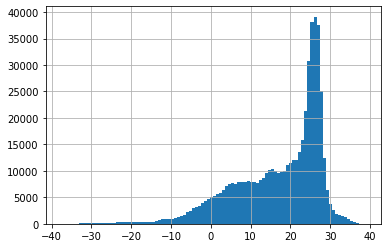

In [8]:
df['AverageTemperature'].hist(bins=100)

**Comentario.** La frecuencia es más mayor para valores entre 20 y 30. 

### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


##### Gráfica del año promedio mundial de temperatura, del año 2000 a septiembre de 20013

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

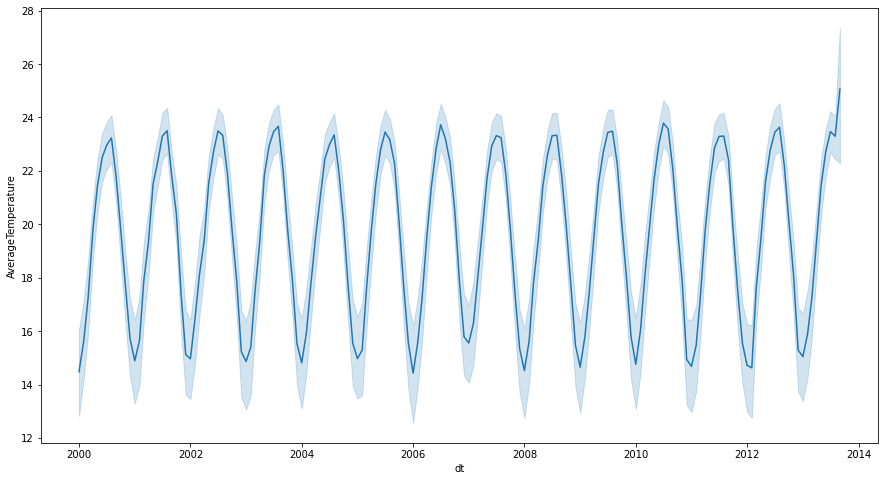

In [8]:
series = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=0, 
                     parse_dates = ["dt"], index_col = 0)

# Eliminamos la columna de AverageTemperatureUncertainty
temp = series.drop(['AverageTemperatureUncertainty'], axis=1)


temp1 = temp.loc['2000-01-01':].reset_index(drop=False)


plt.figure(figsize = (15,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp1)

**Comentario.** No se graficaron todos los años en una gráfica, por la gran cantidad de datos, la capacidad de nuestro ordenador no fue suficiente.

**Conclusión.** La gráfica es estacional, puesto que cada fin y comienzo de año la temperatura es la más baja y aproximadamente luego de medio año julio/agosto se observan las temperaturas más altas. No muestra una tendencia constante, en estos últimos 13 años, la temperatura se mantiene constante a lo largo del tiempo.

#### Gráfico de los últimos 100 años

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

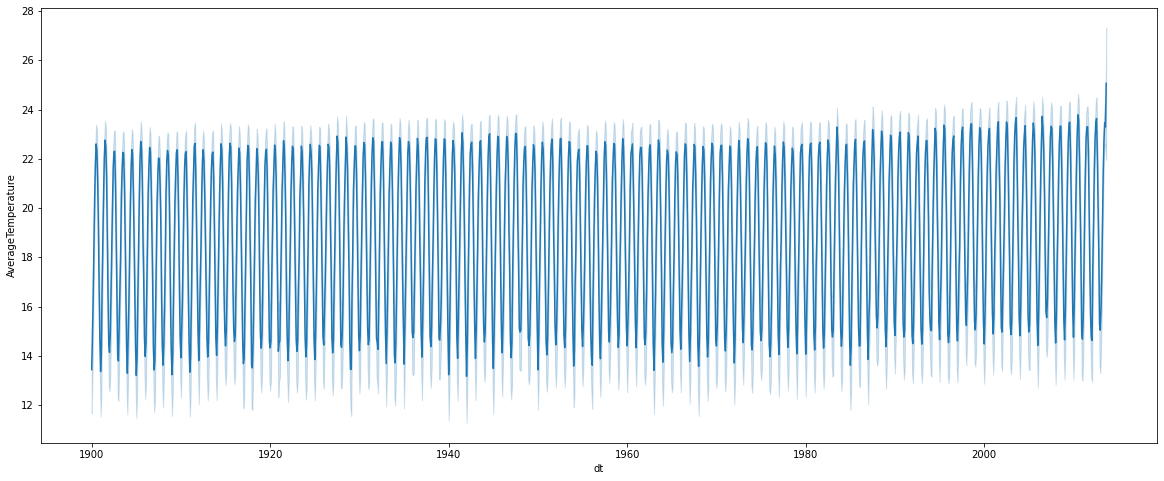

In [9]:
# Ultimos 100 años

temp2 = temp.loc['1900-01-01':].reset_index(drop=False)


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp2)

**Comentario.** En los últimos 100 años la tendencia se mantiene constante, no parece incrementar ni descender la temperatura, aunque a partir de 1980 parace haber una leve tendencia de aumento hasta 2013

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


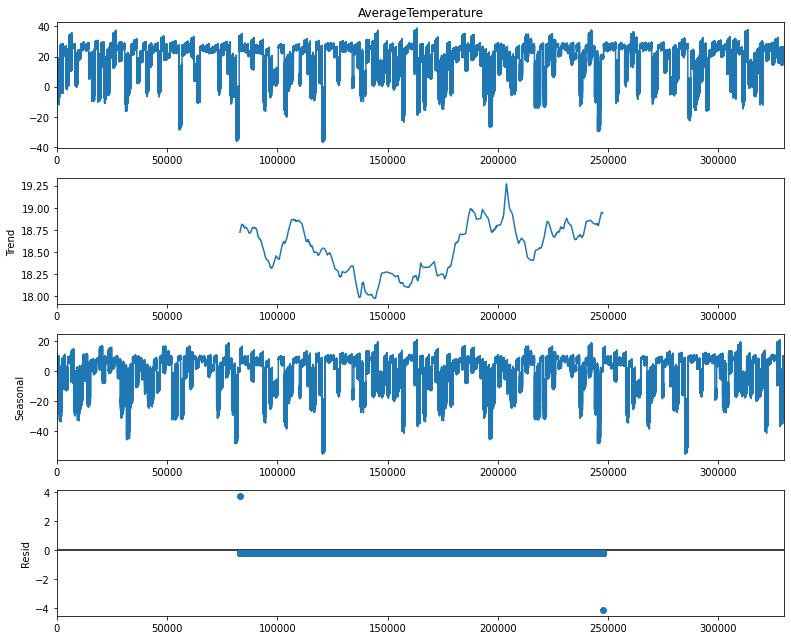

"\n#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/\n\n# Ejemplo de descomposición de serie de tiempo\n\ndescomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],\n                                                  model='additive', freq=12)  \n\nfigure = descomposicion.plot(figsize=(10, 8))\nplt.figure(figsize=(10, 8))\n"

In [10]:
# https://soloelectronicos.com/2021/06/27/visualizacion-de-series-temporales-con-python-3/
#period=164409
temp = temp2
temp = temp.dropna()

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(temp['AverageTemperature'],model='additive', period=164409)
                                                  
fig = decomposition.plot()
plt.show()

"""
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

# Ejemplo de descomposición de serie de tiempo

descomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],
                                                  model='additive', freq=12)  

figure = descomposicion.plot(figsize=(10, 8))
plt.figure(figsize=(10, 8))
"""

**Comentario.** 

Observando la **tendencia**, vemos que en los últimos años, se tiene un ligero aumento, pero no es muy grande

**Estacionalidad.** Vemos que la gráfica repite un ciclo cada cierto tiempo, tiene picos negativos marcados, luego regresa a oscilar al rededor de cero.

No se observa comportamiento muy aleatorio

### d. Determine si es necesario transformar la serie. Explique. 


No es necesario transformar los datos, ya que la serie no tuvo una tendencia que aumentara fuertemente y su varianza fue constante.

### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


In [7]:
# division_entreno_prueba([1,2,3,4,5],2)

def division_entreno_prueba(datos, n_prueba):
    return datos[:-n_prueba], datos[-n_prueba:]

def medir_rmse(actual, predicho):
    return sqrt(mean_squared_error(actual, predicho))

**Predicción Sarima**

In [8]:
# validación "walk-forward" para datos univariados
def validacion_al_frente(datos, n_prueba, metodo, cfg):
    predicciones = []
    # dividir el conjunto de datos
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    # grabar la historia con el conjunto de datos de entrenamiento
    historia = [x for x in entreno]
    # pasar por cada incremento de tiempo en el conjunto de prueba
    for i in range(len(prueba)):
        # ajustar el modelo a los datos y predecir los datos históricos
        if metodo == "promedio":
            yhat = prediccion_promedio(historia, cfg)
        elif metodo == "sarima":
            yhat = prediccion_sarima(historia, cfg)
        elif metodo == "exp":
            yhat = prediccion_alisamiento_exp(historia, cfg)
        # agregar el dato predicho en la lista de preducciones
        predicciones.append(yhat)
        # agregar la observación a la historia para la siguiente iteración
        historia.append(prueba[i])
    # estimar el error de las predicciones
    error = medir_rmse(prueba, predicciones)
    return [error, predicciones]

In [9]:
def busqueda_malla(datos, lista_cfg, n_prueba, metodo = "sarima", paralelo = True):
    resultados = None
    if paralelo:
        # ejecutar las configuraciones en paralelo
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing') 
        tareas = (delayed(calificar_modelo)(datos, n_prueba, metodo, cfg) for cfg in lista_cfg) 
        resultados = executor(tareas)
    else:
        resultados = [calificar_modelo(datos, n_prueba, metodo, cfg) for cfg in lista_cfg]
    # eliminar resultados vacíos
    resultados = [r for r in resultados if r[1] != None]
    return resultados

In [10]:
def prediccion_sarima(historia, config):
    orden, orden_estacional, tendencia = config
    # definir el modelo
    modelo = SARIMAX(historia, order = orden, seasonal_order = orden_estacional, trend = tendencia,
      enforce_stationarity = False, enforce_invertibility = False)
    # ajustar el model con los datos
    modelo_ajustado = modelo.fit(disp = False)
    # hacer la predicción de un paso
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

def config_sarima(estacional = [0]):
    modelos = []
    # definir las listas de configuración
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct'] 
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = estacional
    # crear instancias de configuración
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    modelos.append(cfg)
    return modelos

In [11]:
def calificar_modelo(datos, n_prueba, metodo, cfg, debug = False):
    resultado = None
    predicciones = None
    # convertir la confiuración a una llave
    llave = str(cfg)
    if debug:
        resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
    else:
        # una falla durante la validación del modelo sugiere una configuración inestable
        try:
        # nunca mostrar advertencias cuando se busca en malla...demasiado "ruido"
            with catch_warnings():
                filterwarnings("ignore")
                resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
        except:
            error = None
    if resultado is not None:
        print(f' > Modelo{llave} {resultado:.3f}')
    return (llave, resultado, predicciones)

In [12]:
def encontrar_mejor_solucion(series, nombre, metodo = "sarima", muestra = False):
    datos = series.values
    resultados = []
    # dividir los datos
    
    #--------------------------------- Cambio de n_prueba, 
    # ---------------3 años
    n_prueba = 3 # porcenta usado para prueba
    long_max = len(datos) - n_prueba
    print(f"Tamaño Entrenamiento {long_max}")
    print(f"Tamaño Prueba {n_prueba}")
    
    #------------------------------------------------
    
    
    
    # configuraciones de los modelos
    if metodo == "sarima":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_sarima()
    elif metodo == "promedio":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_simple(long_max)
    elif metodo == "exp":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_alisamiento_exp()
        datos = datos[:,0]
    # muestrear algunos
    if muestra:
        lista_cfg_azar = random.sample(lista_cfg, k = 25)
        while len(resultados) < 5:
            lista_cfg_azar = random.sample(lista_cfg, k = 25)
            resultados += busqueda_malla(datos, lista_cfg_azar, n_prueba, metodo)
    else:
        # búsqueda en malla
              
        # Si se tiene capacidad de procesamiento paralelo, paralelo = True (default)
        paralelo = True
        resultados = busqueda_malla(datos, lista_cfg, n_prueba, metodo, paralelo)
        
    
    # ordenan las configuraciones por error, ascendente
    resultados.sort(key = lambda tup: tup[1])

    print('terminado')
    # listar las mejores 3 configuraciones
    for cfg, error, predicciones in resultados[:3]:
        print(cfg, error)

    # desplegar
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    prediccion = pd.DataFrame(list(entreno.flatten()) + resultados[0][2])
    ax = pd.DataFrame(datos).plot(label = "Original") # Datos originales
    prediccion.plot(ax = ax, alpha = .7, figsize = (14,7))
    # Esconder las líneas de malla de la gráfica
    # ax.grid(False)

    # Esconder las marcas en los ejes
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig(f"{nombre}_{metodo}.png", transparent = True)
    plt.show()

In [11]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)
mundial = temp3.groupby(['dt']).mean()
mundial = mundial.loc['2010-01-01':].reset_index(drop=False)
sar = mundial[["dt","AverageTemperature"]]
sar = sar.groupby(["dt"]).mean()
sar

AverageTemperature
dt                            
2010-01-01           14.884364
2010-02-01           16.283107
2010-03-01           18.270760
2010-04-01           20.127421
2010-05-01           21.874174
2010-06-01           23.082099
2010-07-01           23.899364
2010-08-01           23.677339
2010-09-01           22.260446
2010-10-01           20.065785
2010-11-01           18.117843
2010-12-01           15.160479
2011-01-01           14.847835
2011-02-01           15.622570
2011-03-01           17.601215
2011-04-01           19.925254
2011-05-01           21.654508
2011-06-01           22.983852
2011-07-01           23.289180
2011-08-01           23.390443
2011-09-01           22.541066
2011-10-01           19.998951
2011-11-01           17.605336
2011-12-01           15.550852
2012-01-01           14.689656
2012-02-01           14.586197
2012-03-01           17.721779
2012-04-01           19.592000
2012-05-01           21.740066
2012-06-01           22.873016
2012-07-01           23.519221
2012-08-01           23.698926
2012-09-01           22.321057
2012-10-01           20.247066
2012-11-01           18.190057
2012-12-01           15.261836
2013-01-01           14.942975
2013-02-01           15.861893
2013-03-01           17.320320
2013-04-01           19.491172
2013-05-01           21.625254
2013-06-01           22.808926
2013-07-01           23.522303
2013-08-01           23.432623
2013-09-01           22.988750

In [14]:
import eia
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm_api
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [17]:
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df

def plot_data(df, x_variable, y_variable, title):
    """
    Plot the x- and y- variables against each other, where the variables are columns in
    a pandas dataframe
    Args:
        df: Pandas dataframe. 
        x_variable: String. Name of x-variable column
        y_variable: String. Name of y-variable column
        title: String. Desired title name
    """
    fig, ax = plt.subplots()
    ax.plot_date(df[x_variable], 
                 df[y_variable], marker='', linestyle='-', label=y_variable)
    fig.autofmt_xdate()
    plt.title(title)
    plt.show()

def decompose_time_series(series, frequency):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive', freq = frequency)
    result.plot()
    plt.show()
    
def time_series_train_test_split(time_series, train_split_fraction):
    """
    Split the data into training and test set.
    """
    split_index = int(round(time_series.shape[0]*train_split_fraction, 0))
    train_set = time_series[:split_index]
    test_set = time_series[:-split_index]
    return train_set, test_set

def sarima_parameter_search(search_range, seasonal = [12]):
    """
    Get all of the parameter combinations for a SARIMA model.
    """
    p = q = d = range(0, search_range)
    trend = ['n','c','t','ct']
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq_combinations = [(x[0], x[1], x[2], x[3], x[4]) for x in list(itertools.product(p, d, q, seasonal, trend))]
    return pdq, seasonal_pdq_combinations

def seasonal_arima_model(time_series, order, seasonal_order, trend):
    """
    Generate a seasonal ARIMA model using a set of hyperparameters. Returns the model fit, and the 
    associated model AIC and BIC values.
    """ 
    try:
        model = SARIMAX(time_series, 
                                   order=order, 
                                   seasonal_order=seasonal_order, 
                                   trend = trend,
                                   enforce_stationarity=False, 
                                   enforce_invertibility=False)
        model_fit = model.fit(disp = False)
        #Print the model results
        print(model_fit.summary())
        return model_fit, model_fit.aic, model_fit.bic
    except:
        print("Could not fit with the designated model parameters")
        return model_fit, model_fit.aic, model_fit.bic
    
def fit_predictions(model_fit, steps_out_to_predict, actual_values):
    """
    This function predicts the SARIMA model out a certain designated number of steps,
    and compares the predictions to the actual values. The root mean squared error and
    the mean absolute error are calculated, comparing the predicted and actual values.
    The function returns the predicted values and their respective confidence intervals.
    Args:
        model_fit:  SARIMA model.
        steps_out_to_predict: Int. Number of steps out to predict the time series.
        actual_values: Series of actual time series values.
    Outputs:
        mean_predicted_values: Series of predicted time series values.
        confidence_interval_predicted_values: Dataframe, containing upper and lower thresholds of the
        confidence interval
    """
    predicted_values = model_fit.get_forecast(steps=steps_out_to_predict)
    mean_predicted_values = predicted_values.predicted_mean
    confidence_interval_predicted_values = predicted_values.conf_int()
    #Compare the actual to the predicted values using RMSE and MAE metrics
    rmse, mae = quantify_rmse_mae(mean_predicted_values, actual_values)
    print("Root mean squared error: ", str(rmse))
    print("Mean absolute error: ", str(mae))
    return mean_predicted_values, confidence_interval_predicted_values
    
def quantify_rmse_mae(predicted_values, actual_values):
    """
    This function calculates the root mean squared error and mean absolute error for 
    the predicted values, when compared to the actual values. These helps help us to
    gauge model performance. 
    Args:
        predicted_values: Series of predicted time series values.
        actual_values: Corresponding series of actual time series values.
    Outputs:
        rmse: Float. Root mean squared error.
        mae: Float. Mean absolute error.
    """
    #calcuate the mean squared error of the model
    rmse = math.sqrt(mean_squared_error(actual_values, predicted_values))
    #Calculate the mean absolute error of the model 
    mae = mean_absolute_error(actual_values, predicted_values)
    #Return the MSE and MAE for the model
    return rmse, mae

def plot_results(mean_predicted_values, confidence_interval_predicted_values, time_series):
    """
    This function plots actual time series data against SARIMA model-predicted values. 
    We include the confidence interval for the predictions. 
    Args:
        mean_predicted_values: Series of float values. The model-predicted values.
        confidence_interval_predicted_values: Pandas dataframe, containing the lower and
        upper confidence intervals.
        time_series: Series of float values. Actual time series values that we want to graph
    Outputs:
        None. Plot of the time series values, as well as the predicted values and associated 
        confidence interval.
    """
    ax = time_series.plot(label='Observed')
    mean_predicted_values.plot(ax=ax, label = 'Forecast', alpha=.7, figsize=(14, 4))
    ax.fill_between(confidence_interval_predicted_values.index,
                    confidence_interval_predicted_values.iloc[:, 0],
                    confidence_interval_predicted_values.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date Index')
    ax.set_ylabel('Value')
    plt.legend()
    plt.show()

In [19]:
##### SARIMA MODEL #####
#Run hyperparameter search on SARIMA model
order_combos, seasonal_order_combos = sarima_parameter_search(search_range = 2)
#Split the data into training and test sets (75/25 split)
training_set, test_set = time_series_train_test_split(time_series = sar, 
                                                        train_split_fraction = .75)
lowest_aic_val = 100000000000
#Generate  model for each of hyperparameter combination in a loop
for order_combo in order_combos:
    for seasonal_order_combo in seasonal_order_combos:
        #Convert the combination to list format
        seasonal_order_combo = list(seasonal_order_combo)
        #Generate the SARIMA model
        model_fit, model_aic, model_bic = seasonal_arima_model(time_series = training_set, 
                                                                order = order_combo, 
                                                                seasonal_order = seasonal_order_combo[0:4],
                                                                trend = seasonal_order_combo[-1])
        #Test model performance, and keep running tab of best performing model
        #Set with the newest value if the lowest_aic_value hasn't yet been calculated (on first run),
        #or if the newly calculated model AIC is lower than the lowest calculated AIC value
        if (model_aic < lowest_aic_val):
            lowest_aic_val = model_aic
            best_model = model_fit
            best_order = order_combo
            best_seasonal_order = seasonal_order_combo
#Print the best model parameters after the 
print("Best model paramaters: order-- ", best_order, ", seasonal order-- ", best_seasonal_order)  
print(best_model.summary())
#Run the data on the test set to gauge model performance
mean_predicted_values, confidence_interval_predicted_values = fit_predictions(best_model, 
                                                                                len(test_set), 
                                                                                test_set)


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:                        SARIMAX   Log Likelihood                -146.014
Date:                Mon, 08 Aug 2022   AIC                            294.028
Time:                        15:32:06   BIC                            295.524
Sample:                    01-01-2010   HQIC                           294.531
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       408.0920    485.015      0.841      0.400    -542.519    1358.703
Ljung-Box (L1) (Q):                  25.09   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.00   Pr

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                 -87.911
Date:                    Mon, 08 Aug 2022   AIC                            179.822
Time:                            15:32:06   BIC                            181.911
Sample:                        01-01-2010   HQIC                           180.276
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       1.0000   6.78e+04   1.47e-05      1.000   -1.33e+05    1.33e+05
sigma2       143.3076   9.72e+06   1.47e-05      1.000    -1.9e+07     1.9e+07
Ljung-Box (L1) (Q): 

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                 -48.978
Date:                    Mon, 08 Aug 2022   AIC                            105.956
Time:                            15:32:07   BIC                            110.134
Sample:                        01-01-2010   HQIC                           106.863
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.0006      2.256      8.421      0.000      14.578      23.423
drift          0.0339      0.107      0.317      0.752      -0.176       0.244
ma.S.L12       1.000

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                  -6.330
Date:                  Mon, 08 Aug 2022   AIC                             18.660
Time:                          15:32:07   BIC                             21.793
Sample:                      01-01-2010   HQIC                            19.340
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8088      0.411     -1.966      0.049      -1.615      -0.002
drift          0.0279      0.018      1.566      0.117      -0.007       0.063
sigma2         0.1070      0.032    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                  -4.377
Date:                    Mon, 08 Aug 2022   AIC                             14.755
Time:                            15:32:07   BIC                             15.346
Sample:                        01-01-2010   HQIC                            13.478
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0001      0.010      0.014      0.989      -0.020       0.021
ma.S.L12       0.2553      0.770      0.332      0.740      -1.253       1.764
sigma2         0.154

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                  -8.402
Date:                  Mon, 08 Aug 2022   AIC                             22.804
Time:                          15:32:08   BIC                             26.077
Sample:                      01-01-2010   HQIC                            23.575
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0148      0.015      0.996      0.319      -0.014       0.044
ar.S.L12       0.9762      0.017     56.253      0.000       0.942       1.010
sigma2         0.1257      0.042    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  -9.312
Date:                    Mon, 08 Aug 2022   AIC                             24.624
Time:                            15:32:08   BIC                             27.758
Sample:                        01-01-2010   HQIC                            25.304
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9927      0.005    197.001      0.000       0.983       1.003
ma.S.L12     -13.1519     75.772     -0.174      0.862    -161.662     135.358
sigma2         0.000

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  -5.060
Date:                    Mon, 08 Aug 2022   AIC                             20.119
Time:                            15:32:09   BIC                             25.342
Sample:                        01-01-2010   HQIC                            21.253
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.6659      0.835     -1.996      0.046      -3.302      -0.030
drift          0.0344      0.024      1.413      0.158      -0.013       0.082
ar.S.L12       1.034

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                  -4.413
Date:                  Mon, 08 Aug 2022   AIC                             14.827
Time:                          15:32:09   BIC                             15.734
Sample:                      01-01-2010   HQIC                            13.831
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0004      0.008     -0.054      0.957      -0.017       0.016
ar.S.L12       0.2171      0.593      0.366      0.714      -0.945       1.379
sigma2         0.1415      0.114    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                  -2.607
Date:                  Mon, 08 Aug 2022   AIC                             13.215
Time:                          15:32:09   BIC                             14.425
Sample:                      01-01-2010   HQIC                            11.887
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.3529      1.529     -1.539      0.124      -5.350       0.644
drift          0.0781      0.053      1.464      0.143      -0.026       0.183
ar.S.L12      -0.1619      0.470    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -4.378
Date:                    Mon, 08 Aug 2022   AIC                             14.755
Time:                            15:32:09   BIC                             15.347
Sample:                        01-01-2010   HQIC                            13.478
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2341      0.744      0.315      0.753      -1.223       1.692
ma.S.L12       0.0063   1.91e+04   3.31e-07      1.000   -3.75e+04    3.75e+04
sigma2         0.154

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -4.377
Date:                    Mon, 08 Aug 2022   AIC                             16.753
Time:                            15:32:10   BIC                             17.542
Sample:                        01-01-2010   HQIC                            15.051
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.009      0.028      0.978      -0.017       0.017
ar.S.L12       0.2451      0.623      0.393      0.694      -0.976       1.466
ma.S.L12       0.080

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -1.531
Date:                    Mon, 08 Aug 2022   AIC                             13.063
Time:                            15:32:10   BIC                             14.049
Sample:                        01-01-2010   HQIC                            10.935
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.2861      4.646     -0.923      0.356     -13.392       4.820
drift          0.1392      0.155      0.898      0.369      -0.164       0.443
ar.S.L12      -0.609

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -64.909
Date:                Mon, 08 Aug 2022   AIC                            137.818
Time:                        15:32:11   BIC                            143.681
Sample:                    01-01-2010   HQIC                           139.761
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.9223      1.442     13.817      0.000      17.096      22.748
drift          0.0061      0.072      0.085      0.933      -0.134       0.147
ma.L1          0.8701      0.158      5.504      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -50.363
Date:                            Mon, 08 Aug 2022   AIC                            108.726
Time:                                    15:32:11   BIC                            112.709
Sample:                                01-01-2010   HQIC                           109.503
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.8527      0.051     16.598      0.000       0.752       0.953
ma.L1          1.0000   2265.208   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -37.609
Date:                            Mon, 08 Aug 2022   AIC                             85.218
Time:                                    15:32:11   BIC                             90.196
Sample:                                01-01-2010   HQIC                            86.190
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.2316      3.313      5.805      0.000      12.739      25.724
drift          0.0244      0.157   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                  -8.628
Date:                             Mon, 08 Aug 2022   AIC                             23.257
Time:                                     15:32:11   BIC                             26.244
Sample:                                 01-01-2010   HQIC                            23.840
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0043      0.004     -0.971      0.332      -0.013       0.004
ma.L1          0.0478      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   1.955
Date:                            Mon, 08 Aug 2022   AIC                              4.091
Time:                                    15:32:12   BIC                              4.408
Sample:                                01-01-2010   HQIC                             1.947
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0400      0.081     -0.494      0.621      -0.199       0.119
ma.L1          0.0795      0.769  

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   1.845
Date:                            Mon, 08 Aug 2022   AIC                              4.310
Time:                                    15:32:12   BIC                              4.628
Sample:                                01-01-2010   HQIC                             2.167
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0010      0.003     -0.326      0.745      -0.007       0.005
ma.L1          0.0700      0.725   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   6.760
Date:                            Mon, 08 Aug 2022   AIC                             -3.520
Time:                                    15:32:12   BIC                             -3.122
Sample:                                01-01-2010   HQIC                            -6.199
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.3932      1.014     -1.374      0.169      -3.380       0.594
drift          0.0521      0.038   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -7.902
Date:                             Mon, 08 Aug 2022   AIC                             23.804
Time:                                     15:32:13   BIC                             28.168
Sample:                                 01-01-2010   HQIC                            24.832
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7471      0.356     -2.101      0.036      -1.444      -0.050
ma.L1         -0.1902      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -7.706
Date:                             Mon, 08 Aug 2022   AIC                             25.412
Time:                                     15:32:13   BIC                             30.867
Sample:                                 01-01-2010   HQIC                            26.697
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9140      0.554     -1.650      0.099      -2.000       0.172
drift          0.0233      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.466
Date:                            Mon, 08 Aug 2022   AIC                             24.932
Time:                                    15:32:13   BIC                             29.910
Sample:                                01-01-2010   HQIC                            25.903
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6091      0.412     -1.477      0.140      -1.417       0.199
ma.L1         -0.2318      0.288   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -6.606
Date:                            Mon, 08 Aug 2022   AIC                             23.211
Time:                                    15:32:14   BIC                             28.190
Sample:                                01-01-2010   HQIC                            24.183
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0120      0.017      0.708      0.479      -0.021       0.045
ma.L1         14.3725    113.081   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -2.412
Date:                            Mon, 08 Aug 2022   AIC                             16.824
Time:                                    15:32:14   BIC                             22.798
Sample:                                01-01-2010   HQIC                            17.990
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0462      0.645     -1.622      0.105      -2.310       0.218
drift          0.0199      0.007   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -4.163
Date:                             Mon, 08 Aug 2022   AIC                             16.325
Time:                                     15:32:15   BIC                             17.536
Sample:                                 01-01-2010   HQIC                            14.997
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0011      0.010      0.111      0.912      -0.019       0.021
ma.L1         -0.2535      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                   0.655
Date:                             Mon, 08 Aug 2022   AIC                              8.690
Time:                                     15:32:15   BIC                             10.203
Sample:                                 01-01-2010   HQIC                             7.030
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.6428      0.797     -3.318      0.001      -4.204      -1.082
drift          0.0878      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   1.995
Date:                            Mon, 08 Aug 2022   AIC                              6.009
Time:                                    15:32:15   BIC                              6.406
Sample:                                01-01-2010   HQIC                             3.330
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0611      0.188     -0.325      0.745      -0.429       0.307
ma.L1          0.0756      0.615   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   7.138
Date:                            Mon, 08 Aug 2022   AIC                             -2.276
Time:                                    15:32:16   BIC                             -1.799
Sample:                                01-01-2010   HQIC                            -5.491
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.7204      0.756     -3.597      0.000      -4.203      -1.238
drift          0.0877      0.025   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -34.971
Date:                              Mon, 08 Aug 2022   AIC                             75.943
Time:                                      15:32:16   BIC                             78.930
Sample:                                  01-01-2010   HQIC                            76.526
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0754      0.373      0.202      0.840      -0.656       0.807
ma.S.L12       1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -15.484
Date:                            Mon, 08 Aug 2022   AIC                             32.967
Time:                                    15:32:16   BIC                             33.963
Sample:                                01-01-2010   HQIC                            33.162
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2754      0.104      2.646      0.008       0.071       0.479
Ljung-Box (L1) (Q):               

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -15.407
Date:                            Mon, 08 Aug 2022   AIC                             36.813
Time:                                    15:32:16   BIC                             39.801
Sample:                                01-01-2010   HQIC                            37.397
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0758      0.739      0.103      0.918      -1.373       1.525
drift         -0.0013      0.030   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -4.687
Date:                              Mon, 08 Aug 2022   AIC                             15.374
Time:                                      15:32:17   BIC                             15.612
Sample:                                  01-01-2010   HQIC                            13.767
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0047      0.008      0.617      0.537      -0.010       0.020
ma.S.L12      -1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -16.373
Date:                            Mon, 08 Aug 2022   AIC                             36.745
Time:                                    15:32:17   BIC                             38.834
Sample:                                01-01-2010   HQIC                            37.199
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9700      0.066     14.658      0.000       0.840       1.100
sigma2         0.2784      0.107  

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -16.313
Date:                            Mon, 08 Aug 2022   AIC                             40.627
Time:                                    15:32:17   BIC                             44.805
Sample:                                01-01-2010   HQIC                            41.533
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1106      0.592     -0.187      0.852      -1.271       1.050
drift          0.0057      0.024  

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -15.387
Date:                              Mon, 08 Aug 2022   AIC                             36.774
Time:                                      15:32:17   BIC                             39.761
Sample:                                  01-01-2010   HQIC                            37.357
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9908      0.061     16.366      0.000       0.872       1.109
ma.S.L12      -0.14

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -15.314
Date:                              Mon, 08 Aug 2022   AIC                             38.628
Time:                                      15:32:18   BIC                             42.611
Sample:                                  01-01-2010   HQIC                            39.406
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0017      0.005      0.346      0.730      -0.008       0.012
ar.S.L12       0.98

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -15.297
Date:                              Mon, 08 Aug 2022   AIC                             40.594
Time:                                      15:32:18   BIC                             45.573
Sample:                                  01-01-2010   HQIC                            41.566
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0998      0.822      0.121      0.903      -1.512       1.711
drift         -0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -7.838
Date:                            Mon, 08 Aug 2022   AIC                             23.676
Time:                                    15:32:18   BIC                             24.465
Sample:                                01-01-2010   HQIC                            21.974
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8388      5.904     -0.142      0.887     -12.411      10.733
drift          0.0305      0.211   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -4.098
Date:                              Mon, 08 Aug 2022   AIC                             16.197
Time:                                      15:32:19   BIC                             16.515
Sample:                                  01-01-2010   HQIC                            14.054
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0073      0.009      0.803      0.422      -0.010       0.025
ar.S.L12      -0.94

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -2.806
Date:                              Mon, 08 Aug 2022   AIC                             15.613
Time:                                      15:32:19   BIC                             16.010
Sample:                                  01-01-2010   HQIC                            12.934
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7879      2.589      1.077      0.282      -2.287       7.863
drift         -0.08

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -28.186
Date:                            Mon, 08 Aug 2022   AIC                             62.373
Time:                                    15:32:19   BIC                             65.206
Sample:                                01-01-2010   HQIC                            62.852
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5254      0.253      2.080      0.038       0.030       1.021
ma.S.L12       1.0000    3.7e+04  

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -28.150
Date:                            Mon, 08 Aug 2022   AIC                             64.300
Time:                                    15:32:19   BIC                             68.078
Sample:                                01-01-2010   HQIC                            64.940
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0048      0.027     -0.182      0.856      -0.057       0.047
ma.L1          0.5255      0.328   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -28.051
Date:                            Mon, 08 Aug 2022   AIC                             66.102
Time:                                    15:32:20   BIC                             70.824
Sample:                                01-01-2010   HQIC                            66.901
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6029      2.356     -0.256      0.798      -5.220       4.014
drift          0.0164      0.109   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -7.083
Date:                             Mon, 08 Aug 2022   AIC                             22.166
Time:                                     15:32:20   BIC                             25.944
Sample:                                 01-01-2010   HQIC                            22.806
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0119      0.115      0.104      0.917      -0.213       0.237
drift          0.0005     

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   4.118
Date:                            Mon, 08 Aug 2022   AIC                             -0.235
Time:                                    15:32:20   BIC                             -0.452
Sample:                                01-01-2010   HQIC                            -2.909
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0463      0.016      2.829      0.005       0.014       0.078
ma.L1         -1.0000    985.381   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   4.095
Date:                            Mon, 08 Aug 2022   AIC                             -0.190
Time:                                    15:32:21   BIC                             -0.406
Sample:                                01-01-2010   HQIC                            -2.864
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0019      0.001      2.616      0.009       0.000       0.003
ma.L1         -0.9999    319.136   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -8.361
Date:                             Mon, 08 Aug 2022   AIC                             24.723
Time:                                     15:32:21   BIC                             28.901
Sample:                                 01-01-2010   HQIC                            25.629
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0009      0.001      1.440      0.150      -0.000       0.002
ma.L1         -1.0001    35

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -8.355
Date:                             Mon, 08 Aug 2022   AIC                             26.710
Time:                                     15:32:22   BIC                             31.933
Sample:                                 01-01-2010   HQIC                            27.843
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0053      0.113     -0.047      0.962      -0.226       0.216
drift          0.0011      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -6.864
Date:                            Mon, 08 Aug 2022   AIC                             23.727
Time:                                    15:32:22   BIC                             28.450
Sample:                                01-01-2010   HQIC                            24.527
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0345      0.023      1.500      0.134      -0.011       0.080
ma.L1         -0.9999   1439.946   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.190
Date:                            Mon, 08 Aug 2022   AIC                             24.380
Time:                                    15:32:22   BIC                             29.102
Sample:                                01-01-2010   HQIC                            25.179
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0012      0.001      1.110      0.267      -0.001       0.003
ma.L1         -1.0008     81.319   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.077
Date:                            Mon, 08 Aug 2022   AIC                             26.154
Time:                                    15:32:22   BIC                             31.821
Sample:                                01-01-2010   HQIC                            27.113
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1971      0.148      1.334      0.182      -0.093       0.487
drift         -0.0071      0.006   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -4.012
Date:                             Mon, 08 Aug 2022   AIC                             16.024
Time:                                     15:32:23   BIC                             16.813
Sample:                                 01-01-2010   HQIC                            14.322
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0027      0.003      0.997      0.319      -0.003       0.008
ma.L1         -1.0000   1.5

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -3.896
Date:                             Mon, 08 Aug 2022   AIC                             17.792
Time:                                     15:32:23   BIC                             18.779
Sample:                                 01-01-2010   HQIC                            15.664
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5067      2.349      0.216      0.829      -4.098       5.111
drift         -0.0148      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   3.883
Date:                            Mon, 08 Aug 2022   AIC                              2.233
Time:                                    15:32:24   BIC                              1.963
Sample:                                01-01-2010   HQIC                            -1.110
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0020      0.002      1.221      0.222      -0.001       0.005
ma.L1         -1.1245      1.759   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -36.429
Date:                              Mon, 08 Aug 2022   AIC                             78.859
Time:                                      15:32:25   BIC                             81.992
Sample:                                  01-01-2010   HQIC                            79.539
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0017      0.019     53.460      0.000       0.965       1.038
ma.S.L12       1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -35.265
Date:                              Mon, 08 Aug 2022   AIC                             80.530
Time:                                      15:32:25   BIC                             85.753
Sample:                                  01-01-2010   HQIC                            81.664
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5406      2.979      1.188      0.235      -2.298       9.380
drift         -0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 -10.606
Date:                            Mon, 08 Aug 2022   AIC                             25.211
Time:                                    15:32:25   BIC                             27.300
Sample:                                01-01-2010   HQIC                            25.665
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1361      0.289      0.471      0.638      -0.430       0.702
sigma2         0.1608      0.053   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                  -5.556
Date:                            Mon, 08 Aug 2022   AIC                             19.111
Time:                                    15:32:26   BIC                             23.289
Sample:                                01-01-2010   HQIC                            20.018
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9767      0.518     -1.885      0.059      -1.992       0.039
drift          0.0331      0.021   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All par

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  -4.054
Date:                              Mon, 08 Aug 2022   AIC                             16.108
Time:                                      15:32:26   BIC                             16.897
Sample:                                  01-01-2010   HQIC                            14.405
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0017      0.021      0.081      0.936      -0.039       0.042
ar.L1         -0.28

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                   1.600
Date:                              Mon, 08 Aug 2022   AIC                              6.800
Time:                                      15:32:26   BIC                              7.786
Sample:                                  01-01-2010   HQIC                             4.672
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.3510      1.272     -2.634      0.008      -5.845      -0.857
drift          0.12

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                  -4.591
Date:                            Mon, 08 Aug 2022   AIC                             19.181
Time:                                    15:32:27   BIC                             24.404
Sample:                                01-01-2010   HQIC                            20.315
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.6067      0.745     -2.156      0.031      -3.067      -0.146
drift          0.0312      0.020   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  -8.195
Date:                              Mon, 08 Aug 2022   AIC                             26.390
Time:                                      15:32:27   BIC                             31.612
Sample:                                  01-01-2010   HQIC                            27.523
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9150      0.532     -1.719      0.086      -1.958       0.128
ar.L1         -0.17

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  -8.038
Date:                              Mon, 08 Aug 2022   AIC                             26.076
Time:                                      15:32:28   BIC                             31.299
Sample:                                  01-01-2010   HQIC                            27.209
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0178      0.017      1.051      0.293      -0.015       0.051
ar.L1         -0.14

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  -5.544
Date:                              Mon, 08 Aug 2022   AIC                             23.089
Time:                                      15:32:28   BIC                             29.356
Sample:                                  01-01-2010   HQIC                            24.449
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2775      0.811     -1.575      0.115      -2.868       0.312
drift          0.02

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                   1.656
Date:                            Mon, 08 Aug 2022   AIC                              6.687
Time:                                    15:32:29   BIC                              7.673
Sample:                                01-01-2010   HQIC                             4.559
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.0092      2.037     -2.950      0.003     -10.002      -2.016
drift          0.1931      0.065   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                  -4.073
Date:                              Mon, 08 Aug 2022   AIC                             18.146
Time:                                      15:32:29   BIC                             19.132
Sample:                                  01-01-2010   HQIC                            16.017
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0087      0.505      0.017      0.986      -0.982       0.999
ar.L1         -0.28

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                   1.635
Date:                              Mon, 08 Aug 2022   AIC                              8.730
Time:                                      15:32:30   BIC                              9.913
Sample:                                  01-01-2010   HQIC                             6.176
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.9954      2.332     -2.570      0.010     -10.567      -1.424
drift          0.19

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -50.620
Date:                Mon, 08 Aug 2022   AIC                            111.241
Time:                        15:32:30   BIC                            118.570
Sample:                    01-01-2010   HQIC                           113.670
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7139      2.495      1.889      0.059      -0.176       9.604
drift         -0.0206      0.053     -0.388      0.698      -0.125       0.084
ar.L1          0.7876      0.124      6.328      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -29.380
Date:                            Mon, 08 Aug 2022   AIC                             68.761
Time:                                    15:32:30   BIC                             73.739
Sample:                                01-01-2010   HQIC                            69.733
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1828      3.206      1.305      0.192      -2.101      10.467
ar.L1          0.7918      0.167   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -29.373
Date:                            Mon, 08 Aug 2022   AIC                             70.745
Time:                                    15:32:31   BIC                             76.720
Sample:                                01-01-2010   HQIC                            71.912
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2794      3.783      1.131      0.258      -3.135      11.694
drift         -0.0059      0.106   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                  -6.893
Date:                             Mon, 08 Aug 2022   AIC                             21.786
Time:                                     15:32:31   BIC                             25.769
Sample:                                 01-01-2010   HQIC                            22.564
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0003      0.001     -0.229      0.819      -0.003       0.002
ar.L1          0.8224      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   3.961
Date:                            Mon, 08 Aug 2022   AIC                              0.078
Time:                                    15:32:31   BIC                              0.395
Sample:                                01-01-2010   HQIC                            -2.066
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6409      0.555      1.155      0.248      -0.446       1.728
ma.L1         -1.4045      2.086   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   5.032
Date:                            Mon, 08 Aug 2022   AIC                             -0.063
Time:                                    15:32:32   BIC                              0.334
Sample:                                01-01-2010   HQIC                            -2.742
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0337      0.034      0.992      0.321      -0.033       0.100
ar.L1          0.9167      0.720   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   2.725
Date:                            Mon, 08 Aug 2022   AIC                              4.549
Time:                                    15:32:32   BIC                              4.946
Sample:                                01-01-2010   HQIC                             1.870
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0005      0.002      0.315      0.753      -0.003       0.004
ar.L1          0.8447      1.137   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   4.380
Date:                            Mon, 08 Aug 2022   AIC                              3.240
Time:                                    15:32:32   BIC                              3.717
Sample:                                01-01-2010   HQIC                             0.025
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9551      0.827     -1.155      0.248      -2.575       0.665
drift          0.0337      0.031   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -8.358
Date:                             Mon, 08 Aug 2022   AIC                             26.716
Time:                                     15:32:33   BIC                             31.939
Sample:                                 01-01-2010   HQIC                            27.850
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0188      0.030      0.628      0.530      -0.040       0.078
ar.L1         -0.2189      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -2.519
Date:                             Mon, 08 Aug 2022   AIC                             17.038
Time:                                     15:32:33   BIC                             23.306
Sample:                                 01-01-2010   HQIC                            18.398
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1187      0.572     -1.955      0.051      -2.240       0.003
drift          0.0196      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.411
Date:                            Mon, 08 Aug 2022   AIC                             24.822
Time:                                    15:32:33   BIC                             29.801
Sample:                                01-01-2010   HQIC                            25.794
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0079      0.562      0.014      0.989      -1.093       1.109
ma.L1          4.6567     16.948   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.080
Date:                            Mon, 08 Aug 2022   AIC                             26.160
Time:                                    15:32:34   BIC                             32.134
Sample:                                01-01-2010   HQIC                            27.326
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0130      0.023      0.560      0.576      -0.033       0.059
ar.L1         -0.0332      0.645   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -4.100
Date:                            Mon, 08 Aug 2022   AIC                             22.199
Time:                                    15:32:34   BIC                             29.170
Sample:                                01-01-2010   HQIC                            23.560
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7184      2.280     -0.754      0.451      -6.187       2.750
drift          0.0364      0.044   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -2.859
Date:                             Mon, 08 Aug 2022   AIC                             15.719
Time:                                     15:32:35   BIC                             16.705
Sample:                                 01-01-2010   HQIC                            13.591
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0017      0.002      0.851      0.395      -0.002       0.005
ar.L1          0.6707      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                   3.213
Date:                             Mon, 08 Aug 2022   AIC                              5.575
Time:                                     15:32:36   BIC                              6.758
Sample:                                 01-01-2010   HQIC                             3.021
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.3973      1.837     -3.482      0.000      -9.998      -2.797
drift          0.2050      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   5.872
Date:                            Mon, 08 Aug 2022   AIC                              0.256
Time:                                    15:32:36   BIC                              0.733
Sample:                                01-01-2010   HQIC                            -2.959
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0511      0.032      1.609      0.108      -0.011       0.113
ar.L1          0.8180      0.085   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  -0.436
Date:                            Mon, 08 Aug 2022   AIC                             12.872
Time:                                    15:32:37   BIC                             13.348
Sample:                                01-01-2010   HQIC                             9.657
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0022      0.008      0.273      0.785      -0.014       0.018
ar.L1          1.1299      1.681   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   7.675
Date:                            Mon, 08 Aug 2022   AIC                             -1.349
Time:                                    15:32:37   BIC                             -0.793
Sample:                                01-01-2010   HQIC                            -5.100
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8680      2.746     -1.409      0.159      -9.250       1.514
drift          0.1240      0.086   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -27.335
Date:                              Mon, 08 Aug 2022   AIC                             62.669
Time:                                      15:32:37   BIC                             66.652
Sample:                                  01-01-2010   HQIC                            63.447
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0699      0.311     -0.224      0.822      -0.680       0.540
ar.L1          0.73

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -1.088
Date:                              Mon, 08 Aug 2022   AIC                              8.176
Time:                                      15:32:38   BIC                              8.414
Sample:                                  01-01-2010   HQIC                             6.568
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6329      0.227     -2.786      0.005      -1.078      -0.188
ma.S.L12      -0.5

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                   2.007
Date:                              Mon, 08 Aug 2022   AIC                              3.985
Time:                                      15:32:38   BIC                              4.303
Sample:                                  01-01-2010   HQIC                             1.842
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1367      0.046      2.956      0.003       0.046       0.227
ar.L1         -0.61

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                   3.996
Date:                              Mon, 08 Aug 2022   AIC                              2.008
Time:                                      15:32:38   BIC                              2.405
Sample:                                  01-01-2010   HQIC                            -0.671
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9185      0.678      1.354      0.176      -0.411       2.248
drift         -0.02

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -12.843
Date:                            Mon, 08 Aug 2022   AIC                             33.686
Time:                                    15:32:39   BIC                             37.668
Sample:                                01-01-2010   HQIC                            34.463
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0015      0.006      0.246      0.806      -0.011       0.014
ar.L1         -0.4708      0.295   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -12.840
Date:                            Mon, 08 Aug 2022   AIC                             35.680
Time:                                    15:32:39   BIC                             40.659
Sample:                                01-01-2010   HQIC                            36.652
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0355      0.609      0.058      0.953      -1.157       1.228
drift          0.0001      0.027   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.854
Date:                              Mon, 08 Aug 2022   AIC                             31.708
Time:                                      15:32:39   BIC                             36.686
Sample:                                  01-01-2010   HQIC                            32.680
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0679      0.120      0.567      0.570      -0.167       0.302
ar.L1         -0.44

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.884
Date:                              Mon, 08 Aug 2022   AIC                             31.768
Time:                                      15:32:39   BIC                             36.746
Sample:                                  01-01-2010   HQIC                            32.739
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0027      0.005      0.497      0.619      -0.008       0.013
ar.L1         -0.45

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.842
Date:                              Mon, 08 Aug 2022   AIC                             33.683
Time:                                      15:32:40   BIC                             39.658
Sample:                                  01-01-2010   HQIC                            34.850
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1509      0.698      0.216      0.829      -1.218       1.520
drift         -0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                   1.643
Date:                            Mon, 08 Aug 2022   AIC                              4.714
Time:                                    15:32:40   BIC                              5.032
Sample:                                01-01-2010   HQIC                             2.571
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0069      0.003      2.620      0.009       0.002       0.012
ar.L1         -0.5898      0.128   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                   4.921
Date:                            Mon, 08 Aug 2022   AIC                              0.157
Time:                                    15:32:40   BIC                              0.555
Sample:                                01-01-2010   HQIC                            -2.522
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9580      1.838      1.066      0.287      -1.644       5.560
drift         -0.0593      0.059   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                   2.201
Date:                              Mon, 08 Aug 2022   AIC                              5.599
Time:                                      15:32:41   BIC                              5.996
Sample:                                  01-01-2010   HQIC                             2.920
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2128      0.075      2.835      0.005       0.066       0.360
ar.L1         -0.57

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                   5.311
Date:                              Mon, 08 Aug 2022   AIC                              1.379
Time:                                      15:32:41   BIC                              1.856
Sample:                                  01-01-2010   HQIC                            -1.836
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0421      1.238      1.649      0.099      -0.385       4.469
drift         -0.06

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -25.483
Date:                            Mon, 08 Aug 2022   AIC                             60.966
Time:                                    15:32:42   BIC                             65.688
Sample:                                01-01-2010   HQIC                            61.765
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0042      0.013     -0.318      0.751      -0.030       0.022
ar.L1          0.6446      0.336   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -25.364
Date:                            Mon, 08 Aug 2022   AIC                             62.727
Time:                                    15:32:42   BIC                             68.394
Sample:                                01-01-2010   HQIC                            63.686
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4185      1.213     -0.345      0.730      -2.795       1.958
drift          0.0108      0.045   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -6.463
Date:                             Mon, 08 Aug 2022   AIC                             20.926
Time:                                     15:32:42   BIC                             24.704
Sample:                                 01-01-2010   HQIC                            21.566
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0013      0.001      1.463      0.143      -0.000       0.003
ar.L1         -0.2683      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   1.634
Date:                            Mon, 08 Aug 2022   AIC                              4.732
Time:                                    15:32:43   BIC                              4.516
Sample:                                01-01-2010   HQIC                             2.058
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5338      0.337     -1.582      0.114      -1.195       0.127
ma.L1          0.3149      0.778   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   7.376
Date:                            Mon, 08 Aug 2022   AIC                             -4.751
Time:                                    15:32:43   BIC                             -5.022
Sample:                                01-01-2010   HQIC                            -8.094
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0776      0.030      2.570      0.010       0.018       0.137
ar.L1         -0.7623      0.594   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   7.024
Date:                            Mon, 08 Aug 2022   AIC                             -4.048
Time:                                    15:32:44   BIC                             -4.319
Sample:                                01-01-2010   HQIC                            -7.391
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0030      0.001      3.281      0.001       0.001       0.005
ar.L1         -0.7403      0.537   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   7.134
Date:                            Mon, 08 Aug 2022   AIC                             -2.269
Time:                                    15:32:44   BIC                             -2.593
Sample:                                01-01-2010   HQIC                            -6.280
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2058      1.244      0.165      0.869      -2.231       2.643
drift         -0.0052      0.052   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.382
Date:                             Mon, 08 Aug 2022   AIC                             22.764
Time:                                     15:32:45   BIC                             27.743
Sample:                                 01-01-2010   HQIC                            23.736
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0312      0.018      1.755      0.079      -0.004       0.066
ar.L1         -0.3150      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.554
Date:                             Mon, 08 Aug 2022   AIC                             23.107
Time:                                     15:32:45   BIC                             28.086
Sample:                                 01-01-2010   HQIC                            24.079
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0013      0.001      1.386      0.166      -0.001       0.003
ar.L1         -0.3105      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.377
Date:                             Mon, 08 Aug 2022   AIC                             24.754
Time:                                     15:32:45   BIC                             30.728
Sample:                                 01-01-2010   HQIC                            25.920
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0421      0.126      0.335      0.737      -0.204       0.288
drift         -0.0005      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -5.106
Date:                            Mon, 08 Aug 2022   AIC                             22.213
Time:                                    15:32:46   BIC                             27.879
Sample:                                01-01-2010   HQIC                            23.172
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0416      0.020      2.107      0.035       0.003       0.080
ar.L1         -0.3866      0.344   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -5.533
Date:                            Mon, 08 Aug 2022   AIC                             23.066
Time:                                    15:32:46   BIC                             28.733
Sample:                                01-01-2010   HQIC                            24.025
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0018      0.001      1.899      0.058   -5.67e-05       0.004
ar.L1         -0.3719      0.350   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   4.013
Date:                             Mon, 08 Aug 2022   AIC                              1.974
Time:                                     15:32:47   BIC                              2.371
Sample:                                 01-01-2010   HQIC                            -0.705
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1391      0.038      3.693      0.000       0.065       0.213
ar.L1         -0.1852      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   5.909
Date:                             Mon, 08 Aug 2022   AIC                              0.181
Time:                                     15:32:48   BIC                              0.658
Sample:                                 01-01-2010   HQIC                            -3.034
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6215      0.750      0.828      0.408      -0.849       2.092
drift         -0.0166      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -2.077
Date:                            Mon, 08 Aug 2022   AIC                             14.155
Time:                                    15:32:48   BIC                             13.884
Sample:                                01-01-2010   HQIC                            10.812
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0987      1.279     -0.077      0.938      -2.606       2.409
ma.L1         -0.8333      1.362   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   4.079
Date:                            Mon, 08 Aug 2022   AIC                              3.842
Time:                                    15:32:49   BIC                              3.518
Sample:                                01-01-2010   HQIC                            -0.169
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1064      0.132      0.806      0.420      -0.152       0.365
ar.L1          0.0090      1.012   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   3.602
Date:                            Mon, 08 Aug 2022   AIC                              4.795
Time:                                    15:32:49   BIC                              4.471
Sample:                                01-01-2010   HQIC                             0.784
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0035      0.005      0.768      0.442      -0.005       0.012
ar.L1          0.0457      1.052   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [19]:
df2 = mundial.rename(columns={'dt': 'ds',
                        'AverageTemperature': 'y'})

In [20]:

# fijar el intervalo de incertidumbre en 95% (el default de Prophet es 80%)
mi_modelo = Prophet(interval_width = 0.95)

Ajustamos el modelo con los datos del dataframe

In [21]:
mi_modelo.fit(df2)

18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing


Le indicaremos que queremos 36 nuevas fechas que representan meses

In [22]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

ds
76 2016-05-01
77 2016-06-01
78 2016-07-01
79 2016-08-01
80 2016-09-01

Este DataFrame de fechas futuras se utiliza como entrada al método "predict" de nuestro modelo ajustado.

In [23]:
prediccion = mi_modelo.predict(fechas_futuras)

Se le pide al Prophet las columnas que son las más relevantes para la predicción. Siendo estas las siguientes:

ds: el tiempo de el valor predicho
yhat: tel valor predicho de nuestra métrica -
yhat_lower: el límite inferior de nuestras predicciones -
yhat_upper: el límite superior de nuestras predicciones

In [24]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
76 2016-05-01  22.044214   21.473403   22.630269
77 2016-06-01  23.170340   22.583641   23.725494
78 2016-07-01  23.912832   23.351093   24.531911
79 2016-08-01  23.929102   23.325569   24.555299
80 2016-09-01  22.771931   22.127316   23.365535

Se pueden observar los resultados graficamente asi como se nota que la temperatura va creciendo en la prediccion generada, siendo el 2016 donde se observa una temperatura mas alta

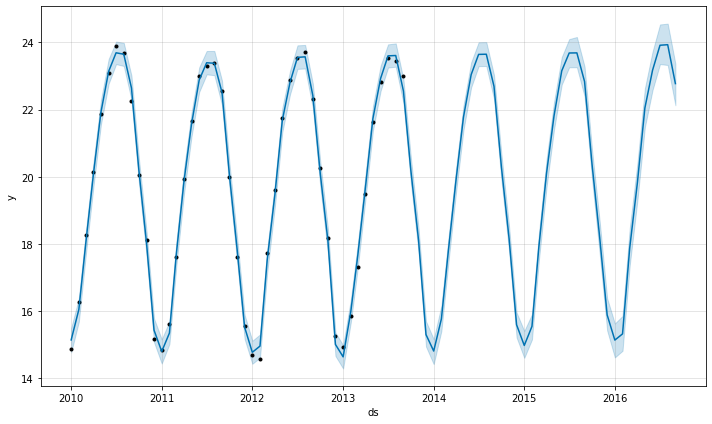

In [25]:
mi_modelo.plot(prediccion,
               uncertainty=True);

Se puede confirmar la tendencia que es creciente desde el 2012, asi como anualmente las mayores temperaturas se encuentran de marzo hasta agosto y empiezan a disminuir de septiembre a enero

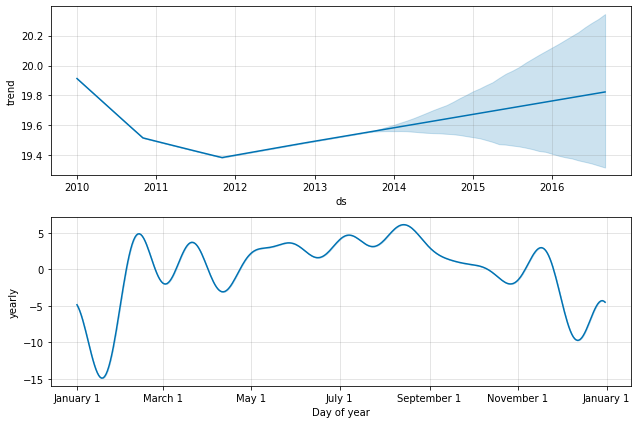

In [26]:
mi_modelo.plot_components(prediccion);

### 3. Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción.

### 4. Haga una predicción, tres años al futuro, usando los años anteriores y determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

### 5. Basado en los resultados obtenidos, diría Ud que hay evidencia para corroborar la tan discutida aseveración de que el Cambio Climático y el Calentamiento Global es real

### 6. Repita los 5 pasos anteriores pero esta vez solo utilizando los datos para Guatemala.

In [27]:
gt = df['Country'] == 'Guatemala'
gua = df[gt]

In [28]:
gua.isnull().sum()

AverageTemperature               39
AverageTemperatureUncertainty    39
Country                           0
dtype: int64

### a. Especifique Inicio, fin, y frecuencia. 


### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

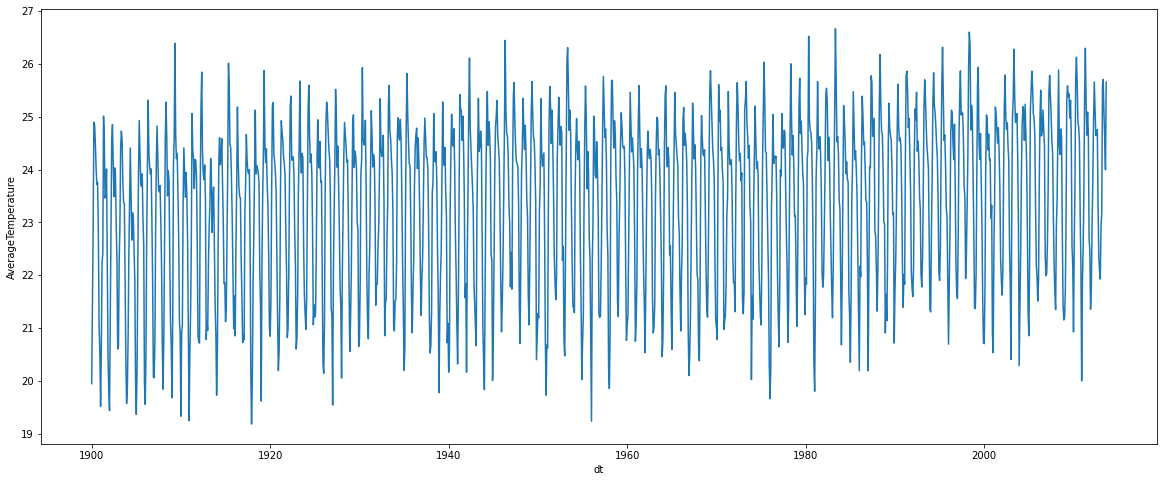

In [29]:


gt = temp2['Country'] == 'Guatemala'
tempGt = temp2[gt]


# Ultimos 100 años


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = tempGt)

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


Se descompone la serie en sus somponentes y al analizar la grafica se puede ver una tendencia estacional, asi como un incremento de la temperatura en los ultimos años.


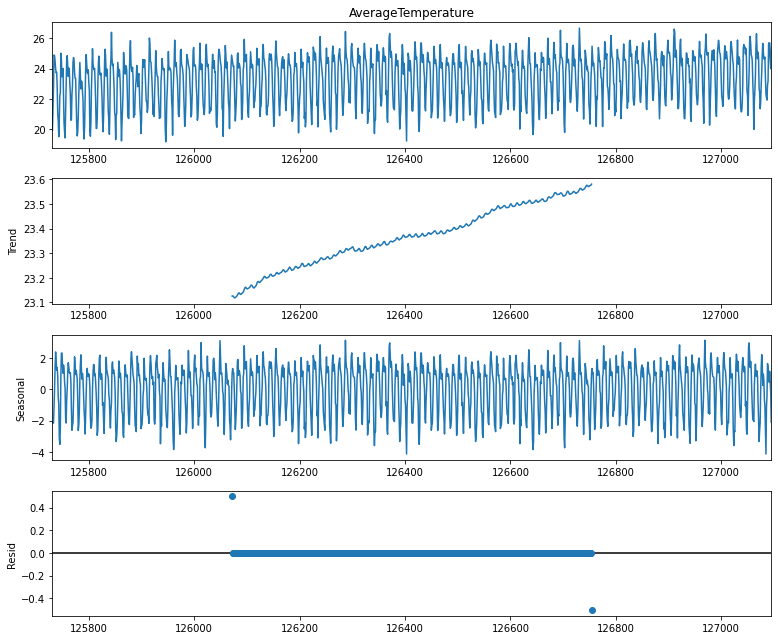

In [30]:
tempGt2 = tempGt

rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(tempGt2['AverageTemperature'],model='additive', period=682)
                                                  
fig = decomposition.plot()


### d. Determine si es necesario transformar la serie. Explique. 


### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [20]:
temp


dt  AverageTemperature   Country
0      1900-01-01              -3.026     Åland
1      1900-02-01              -8.063     Åland
2      1900-03-01              -3.196     Åland
3      1900-04-01               0.781     Åland
4      1900-05-01               4.960     Åland
...           ...                 ...       ...
329862 2013-04-01              21.142  Zimbabwe
329863 2013-05-01              19.059  Zimbabwe
329864 2013-06-01              17.613  Zimbabwe
329865 2013-07-01              17.000  Zimbabwe
329866 2013-08-01              19.759  Zimbabwe

[328818 rows x 3 columns]

In [ ]:
prueba

In [ ]:
prueba.plot(figsize=(16,10))

In [22]:
temp2

dt  AverageTemperature   Country
0      1900-01-01              -3.026     Åland
1      1900-02-01              -8.063     Åland
2      1900-03-01              -3.196     Åland
3      1900-04-01               0.781     Åland
4      1900-05-01               4.960     Åland
...           ...                 ...       ...
329863 2013-05-01              19.059  Zimbabwe
329864 2013-06-01              17.613  Zimbabwe
329865 2013-07-01              17.000  Zimbabwe
329866 2013-08-01              19.759  Zimbabwe
329867 2013-09-01                 NaN  Zimbabwe

[329868 rows x 3 columns]

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(temp1['AverageTemperature'], model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)

In [15]:
temp1

dt  AverageTemperature   Country
0     2000-01-01               0.197     Åland
1     2000-02-01              -0.023     Åland
2     2000-03-01               0.615     Åland
3     2000-04-01               4.124     Åland
4     2000-05-01               8.557     Åland
...          ...                 ...       ...
40090 2013-05-01              19.059  Zimbabwe
40091 2013-06-01              17.613  Zimbabwe
40092 2013-07-01              17.000  Zimbabwe
40093 2013-08-01              19.759  Zimbabwe
40094 2013-09-01                 NaN  Zimbabwe

[40095 rows x 3 columns]

# Guatemala








### 1. Haga un análisis exploratorio de los datos que se le presentan (AverageTemperature), se sugiere explorar el comportamiento de la variable y si está distribuidas normalmente, en caso de ser continuas. Meses en los que más/menos  temperatura  hay, comportamiento en los últimos x años,  etc.

In [15]:
df_Guatemala = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0)
df_Guatemala = df_Guatemala[df_Guatemala['Country'] == 'Guatemala']
df_Guatemala

AverageTemperature  AverageTemperatureUncertainty    Country
dt                                                                      
1825-01-01              21.204                          1.770  Guatemala
1825-02-01              21.584                          1.374  Guatemala
1825-03-01              23.038                          1.704  Guatemala
1825-04-01              25.276                          1.923  Guatemala
1825-05-01              24.995                          1.276  Guatemala
...                        ...                            ...        ...
2013-05-01              25.704                          0.461  Guatemala
2013-06-01              25.048                          0.403  Guatemala
2013-07-01              24.588                          0.316  Guatemala
2013-08-01              23.996                          0.496  Guatemala
2013-09-01              25.655                          1.199  Guatemala

[2265 rows x 3 columns]

Se observan los tipos de datos que hay en el dataframe

In [17]:
df_Guatemala.head()

AverageTemperature  AverageTemperatureUncertainty    Country
dt                                                                      
1825-01-01              21.204                          1.770  Guatemala
1825-02-01              21.584                          1.374  Guatemala
1825-03-01              23.038                          1.704  Guatemala
1825-04-01              25.276                          1.923  Guatemala
1825-05-01              24.995                          1.276  Guatemala

In [18]:
df_Guatemala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2265 entries, 1825-01-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             2226 non-null   float64
 1   AverageTemperatureUncertainty  2226 non-null   float64
 2   Country                        2265 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.8+ KB


In [19]:
profile = ProfileReport(df_Guatemala)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se observa la cantidad de datos vacios en el dataframe

In [20]:
df_Guatemala.isnull().sum()

AverageTemperature               39
AverageTemperatureUncertainty    39
Country                           0
dtype: int64

Se puede observar que los datos tienen una distribucion  sesgada a la derecha

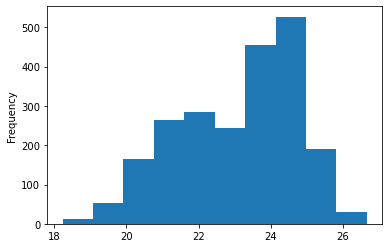

In [21]:
df_Guatemala['AverageTemperature'].plot.hist();


### 2. Haga una serie univariante por la variable AverageTemperature: 


### a. Especifique Inicio, fin, y frecuencia. 


Trabajaremos a partir del año **1900 hasta 2013**, con una frecuencia de 

<AxesSubplot:>

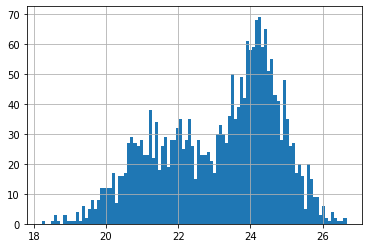

In [22]:
df_Guatemala['AverageTemperature'].hist(bins=100)

**Comentario.** La frecuencia es más mayor para valores entre 23 y 25. 

### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


##### Gráfica del año promedio mundial de temperatura, del año 2000 a septiembre de 2013

In [35]:
series_Gt = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=0, 
                     parse_dates = ["dt"], index_col = 0)
series_Gt = series_Gt[series_Gt['Country']=='Guatemala']
series_Gt

AverageTemperature  AverageTemperatureUncertainty    Country
dt                                                                      
1825-01-01              21.204                          1.770  Guatemala
1825-02-01              21.584                          1.374  Guatemala
1825-03-01              23.038                          1.704  Guatemala
1825-04-01              25.276                          1.923  Guatemala
1825-05-01              24.995                          1.276  Guatemala
...                        ...                            ...        ...
2013-05-01              25.704                          0.461  Guatemala
2013-06-01              25.048                          0.403  Guatemala
2013-07-01              24.588                          0.316  Guatemala
2013-08-01              23.996                          0.496  Guatemala
2013-09-01              25.655                          1.199  Guatemala

[2265 rows x 3 columns]

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

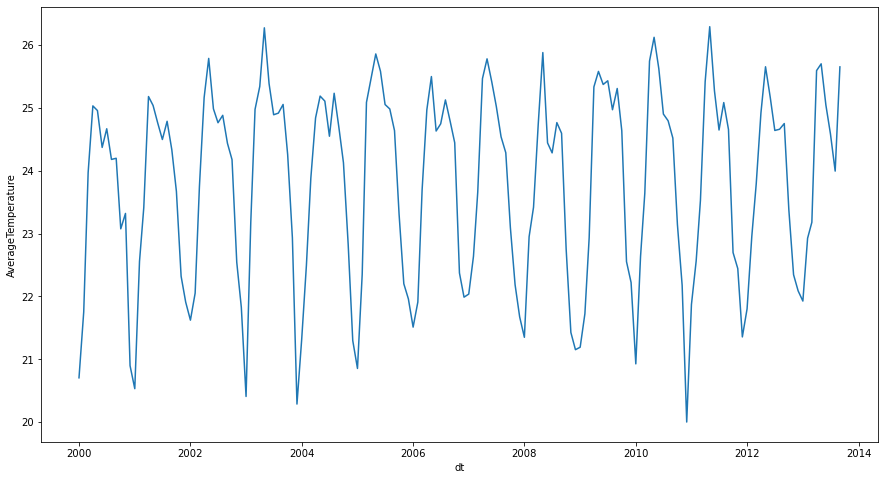

In [36]:
# Eliminamos la columna de AverageTemperatureUncertainty
temp = series_Gt.drop(['AverageTemperatureUncertainty'], axis=1)


temp1 = temp.loc['2000-01-01':].reset_index(drop=False)


plt.figure(figsize = (15,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp1)

**Conclusión.** La gráfica es estacional, puesto que cada fin y comienzo de año la temperatura es la más baja y aproximadamente luego de medio año julio/agosto se observan las temperaturas más altas. No muestra una tendencia constante, en estos últimos 13 años, la temperatura se mantiene constante a lo largo del tiempo.

#### Gráfico de los últimos 100 años

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

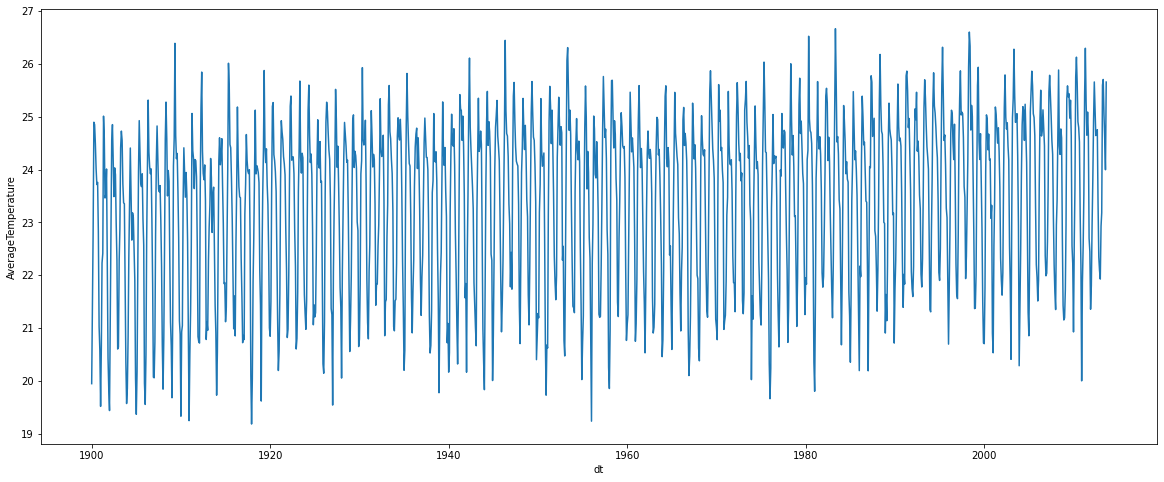

In [37]:
# Ultimos 100 años

temp2 = temp.loc['1900-01-01':].reset_index(drop=False)


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp2)

**Comentario.** En los últimos 100 años la tendencia se mantiene constante, no parece incrementar ni descender la temperatura, aunque a partir de 1980 parace haber una leve tendencia de aumento hasta 2013

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


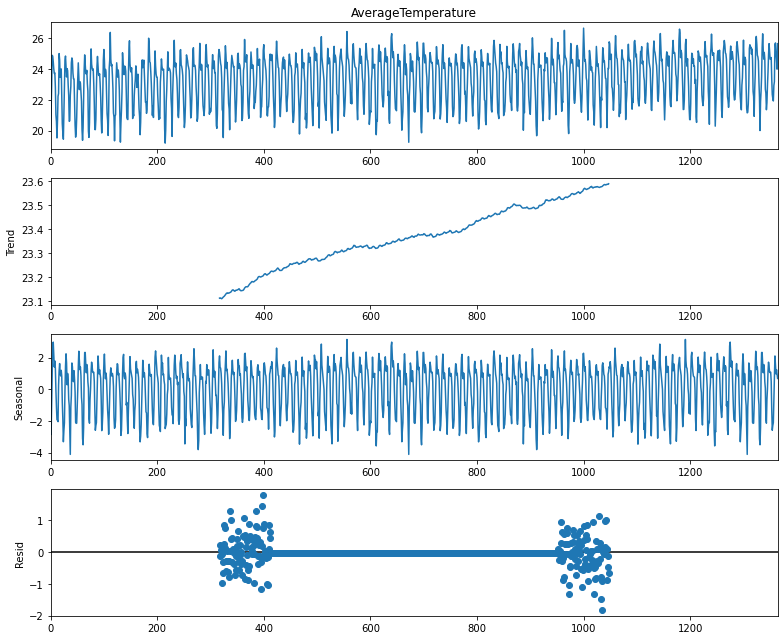

"\n#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/\n\n# Ejemplo de descomposición de serie de tiempo\n\ndescomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],\n                                                  model='additive', freq=12)  \n\nfigure = descomposicion.plot(figsize=(10, 8))\nplt.figure(figsize=(10, 8))\n"

In [41]:
# https://soloelectronicos.com/2021/06/27/visualizacion-de-series-temporales-con-python-3/
#period=164409
temp = temp2
temp = temp.dropna()

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

#Se cmabio el numero de periodo por la cantidad de observaciones existenes para Guatemlaa
decomposition = sm.tsa.seasonal_decompose(temp['AverageTemperature'],model='additive', period=635)
                                                  
fig = decomposition.plot()
plt.show()

"""
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

# Ejemplo de descomposición de serie de tiempo

descomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],
                                                  model='additive', freq=12)  

figure = descomposicion.plot(figsize=(10, 8))
plt.figure(figsize=(10, 8))
"""

**Comentario.** 

Observando la **tendencia**, vemos que en los últimos años, se tiene un ligero aumento, pero no es muy grande

**Estacionalidad.** Vemos que la gráfica repite un ciclo cada cierto tiempo, tiene picos negativos marcados, luego regresa a oscilar al rededor de cero.

No se observa comportamiento muy aleatorio

### d. Determine si es necesario transformar la serie. Explique. 


No es necesario transformar los datos, ya que la serie no tuvo una tendencia que aumentara fuertemente y su varianza fue constante.

### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


In [42]:
# division_entreno_prueba([1,2,3,4,5],2)

def division_entreno_prueba(datos, n_prueba):
    return datos[:-n_prueba], datos[-n_prueba:]

def medir_rmse(actual, predicho):
    return sqrt(mean_squared_error(actual, predicho))

**Predicción Sarima**

In [43]:
# validación "walk-forward" para datos univariados
def validacion_al_frente(datos, n_prueba, metodo, cfg):
    predicciones = []
    # dividir el conjunto de datos
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    # grabar la historia con el conjunto de datos de entrenamiento
    historia = [x for x in entreno]
    # pasar por cada incremento de tiempo en el conjunto de prueba
    for i in range(len(prueba)):
        # ajustar el modelo a los datos y predecir los datos históricos
        if metodo == "promedio":
            yhat = prediccion_promedio(historia, cfg)
        elif metodo == "sarima":
            yhat = prediccion_sarima(historia, cfg)
        elif metodo == "exp":
            yhat = prediccion_alisamiento_exp(historia, cfg)
        # agregar el dato predicho en la lista de preducciones
        predicciones.append(yhat)
        # agregar la observación a la historia para la siguiente iteración
        historia.append(prueba[i])
    # estimar el error de las predicciones
    error = medir_rmse(prueba, predicciones)
    return [error, predicciones]

In [44]:
def busqueda_malla(datos, lista_cfg, n_prueba, metodo = "sarima", paralelo = True):
    resultados = None
    if paralelo:
        # ejecutar las configuraciones en paralelo
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing') 
        tareas = (delayed(calificar_modelo)(datos, n_prueba, metodo, cfg) for cfg in lista_cfg) 
        resultados = executor(tareas)
    else:
        resultados = [calificar_modelo(datos, n_prueba, metodo, cfg) for cfg in lista_cfg]
    # eliminar resultados vacíos
    resultados = [r for r in resultados if r[1] != None]
    return resultados

In [45]:
def prediccion_sarima(historia, config):
    orden, orden_estacional, tendencia = config
    # definir el modelo
    modelo = SARIMAX(historia, order = orden, seasonal_order = orden_estacional, trend = tendencia,
      enforce_stationarity = False, enforce_invertibility = False)
    # ajustar el model con los datos
    modelo_ajustado = modelo.fit(disp = False)
    # hacer la predicción de un paso
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

def config_sarima(estacional = [0]):
    modelos = []
    # definir las listas de configuración
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct'] 
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = estacional
    # crear instancias de configuración
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    modelos.append(cfg)
    return modelos

In [46]:
def calificar_modelo(datos, n_prueba, metodo, cfg, debug = False):
    resultado = None
    predicciones = None
    # convertir la confiuración a una llave
    llave = str(cfg)
    if debug:
        resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
    else:
        # una falla durante la validación del modelo sugiere una configuración inestable
        try:
        # nunca mostrar advertencias cuando se busca en malla...demasiado "ruido"
            with catch_warnings():
                filterwarnings("ignore")
                resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
        except:
            error = None
    if resultado is not None:
        print(f' > Modelo{llave} {resultado:.3f}')
    return (llave, resultado, predicciones)

In [47]:
def encontrar_mejor_solucion(series, nombre, metodo = "sarima", muestra = False):
    datos = series.values
    resultados = []
    # dividir los datos
    
    #--------------------------------- Cambio de n_prueba, 
    # ---------------3 años
    n_prueba = 3 # porcenta usado para prueba
    long_max = len(datos) - n_prueba
    print(f"Tamaño Entrenamiento {long_max}")
    print(f"Tamaño Prueba {n_prueba}")
    
    #------------------------------------------------
    
    
    
    # configuraciones de los modelos
    if metodo == "sarima":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_sarima()
    elif metodo == "promedio":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_simple(long_max)
    elif metodo == "exp":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_alisamiento_exp()
        datos = datos[:,0]
    # muestrear algunos
    if muestra:
        lista_cfg_azar = random.sample(lista_cfg, k = 25)
        while len(resultados) < 5:
            lista_cfg_azar = random.sample(lista_cfg, k = 25)
            resultados += busqueda_malla(datos, lista_cfg_azar, n_prueba, metodo)
    else:
        # búsqueda en malla
              
        # Si se tiene capacidad de procesamiento paralelo, paralelo = True (default)
        paralelo = True
        resultados = busqueda_malla(datos, lista_cfg, n_prueba, metodo, paralelo)
        
    
    # ordenan las configuraciones por error, ascendente
    resultados.sort(key = lambda tup: tup[1])

    print('terminado')
    # listar las mejores 3 configuraciones
    for cfg, error, predicciones in resultados[:3]:
        print(cfg, error)

    # desplegar
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    prediccion = pd.DataFrame(list(entreno.flatten()) + resultados[0][2])
    ax = pd.DataFrame(datos).plot(label = "Original") # Datos originales
    prediccion.plot(ax = ax, alpha = .7, figsize = (14,7))
    # Esconder las líneas de malla de la gráfica
    # ax.grid(False)

    # Esconder las marcas en los ejes
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig(f"{nombre}_{metodo}.png", transparent = True)
    plt.show()

In [ ]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)
mundial = temp3.groupby(['dt']).mean()
mundial = mundial.loc['2010-01-01':].reset_index(drop=False)
mundial

In [ ]:

nombre = 'AverageTemperature'
encontrar_mejor_solucion(mundial, nombre, metodo = "sarima")


Tamaño Entrenamiento 42
Tamaño Prueba 3
Encontrando la mejor solución para sarima


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [ ]:
df2_Gt = mundial.rename(columns={'dt': 'ds',
                        'AverageTemperature': 'y'})

In [ ]:

# fijar el intervalo de incertidumbre en 95% (el default de Prophet es 80%)
mi_modelo = Prophet(interval_width = 0.95)

Ajustamos el modelo con los datos del dataframe

In [21]:
mi_modelo.fit(df2_Gt)

18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing


Le indicaremos que queremos 36 nuevas fechas que representan meses

In [22]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

ds
76 2016-05-01
77 2016-06-01
78 2016-07-01
79 2016-08-01
80 2016-09-01

Este DataFrame de fechas futuras se utiliza como entrada al método "predict" de nuestro modelo ajustado.

In [23]:
prediccion = mi_modelo.predict(fechas_futuras)

Se le pide al Prophet las columnas que son las más relevantes para la predicción. Siendo estas las siguientes:

ds: el tiempo de el valor predicho
yhat: tel valor predicho de nuestra métrica -
yhat_lower: el límite inferior de nuestras predicciones -
yhat_upper: el límite superior de nuestras predicciones

In [24]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
76 2016-05-01  22.044214   21.473403   22.630269
77 2016-06-01  23.170340   22.583641   23.725494
78 2016-07-01  23.912832   23.351093   24.531911
79 2016-08-01  23.929102   23.325569   24.555299
80 2016-09-01  22.771931   22.127316   23.365535

Se pueden observar los resultados graficamente asi como se nota que la temperatura va creciendo en la prediccion generada, siendo el 2016 donde se observa una temperatura mas alta

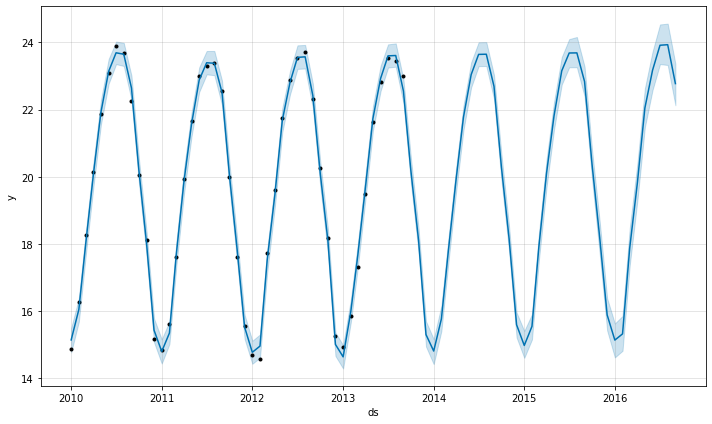

In [25]:
mi_modelo.plot(prediccion,
               uncertainty=True);

Se puede confirmar la tendencia que es creciente desde el 2012, asi como anualmente las mayores temperaturas se encuentran de marzo hasta agosto y empiezan a disminuir de septiembre a enero

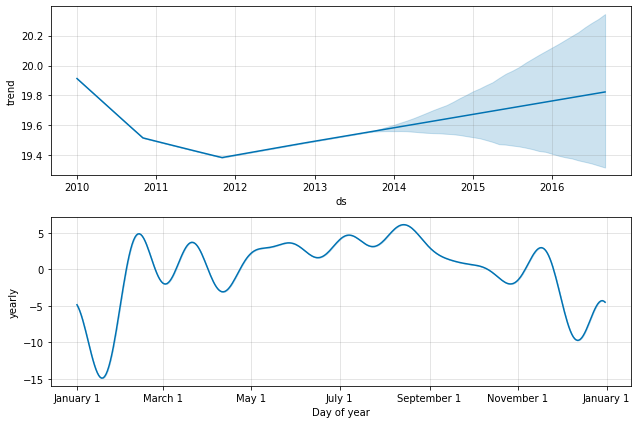

In [26]:
mi_modelo.plot_components(prediccion);